# **회귀 알고리즘을 활용한 주가예측**
1. Linear Regression
1. Regression Tree
1. Random Forest
1. **SVR** : Support Vector Regression

<br/>

# **1 선형 회귀모델**
Linear Regression

## **01 선형 회귀모델용 함수의 정의**
선형 회귀모델 함수를 정의합니다

In [43]:
import numpy as np

# 현재 가중치를 이용하여 y_hat 예측값을 계산한다
def compute_prediction(X, weights):
    predictions = np.dot(X, weights)
    return predictions # y_hat (X under weights : numpy.ndarray)

# 매 단계에서 가중치를 업데이트 한다
def update_weights_gd(X_train, y_train, weights, learning_rate):
    predictions   = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m             = y_train.shape[0]
    weights      += learning_rate / float(m) * weights_delta
    return weights

# 비용함수 J(w)를 계산하는 함수
def compute_cost(X, y, weights):
    predictions = compute_prediction(X, weights)
    cost        = np.mean((predictions - y) ** 2 / 2.0)
    return cost

In [44]:
# 반복 시행 횟수 100번마다 비용함수를 출력
def train_linear_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False, iter_print=100):
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train   = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights   = update_weights_gd(X_train, y_train, weights, learning_rate)
        if iteration % iter_print == 0:
            print("{:>4} th Learning Cost : {:.5f}".format(iteration, compute_cost(X_train, y_train, weights)))
    return weights # learned weights (numpy.ndarray)

# 학습모델을 이용하여 새로운 입력결과를 예측하는 함수
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X         = np.hstack((intercept, X))
    return compute_prediction(X, weights)

<br/>

## **02 샘플 데이터 모델 적용하기**
샘플데이터를 활용하여 선형모델을 학습하여 결과를 출력합니다

In [45]:
# A small example / 선형 모델의 학습
X_train = np.array([[6], [2], [3], [4], [1], [5], [2], [6], [4], [7]])
y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8, 5.2, 1.5, 5.3, 4.4, 6.8])
weights = train_linear_regression(X_train, y_train, 
                                  max_iter = 100, 
                                  learning_rate = 0.01, 
                                  fit_intercept = True,
                                  iter_print = 20)

   0 th Learning Cost : 5.57197
  20 th Learning Cost : 0.08735
  40 th Learning Cost : 0.08512
  60 th Learning Cost : 0.08360
  80 th Learning Cost : 0.08218


In [4]:
# 학습 모델을 사용하여, Test 데이터의 예측값을 출력
X_test  = np.array([[1.3], [3.5], [5.2], [2.8]])
predictions = predict(X_test, weights)
predictions

array([1.29545214, 3.31854448, 4.88184311, 2.67483328])

## **03 Visualization**
matplotlib로 시각화 하기

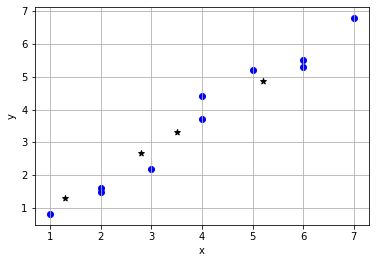

In [5]:
%matplotlib inline
# 샘플로 학습한 모델의 성능을 확인한다
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], y_train,     marker = 'o', c = 'b')
plt.scatter(X_test[:,  0], predictions, marker = '*', c = 'k')
plt.xlabel('x'); plt.ylabel('y')
plt.grid();      plt.show()

<br/>

# **3 당뇨 데이터를 활용한 분석**
datasets diabetes

## **01 Linear Regression 분석**
선병모델을 활용하여 데이터를 분석합니다

In [6]:
# 당뇨질환 데이터를 불러옵니다
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)

(442, 10)


In [7]:
num_train = 300    # 전체 데이터 중 30개만 추출한다
X_train = diabetes.data[:-num_train, :]
y_train = diabetes.target[:-num_train]
weights = train_linear_regression(X_train, y_train, 
                                  max_iter = 5000, 
                                  learning_rate = 1, 
                                  fit_intercept = True,
                                  iter_print = 500)

   0 th Learning Cost : 2868.81478
 500 th Learning Cost : 1430.92740
1000 th Learning Cost : 1336.27657
1500 th Learning Cost : 1322.76923
2000 th Learning Cost : 1320.28422
2500 th Learning Cost : 1319.62825
3000 th Learning Cost : 1319.35963
3500 th Learning Cost : 1319.20162
4000 th Learning Cost : 1319.08757
4500 th Learning Cost : 1318.99721


In [8]:
num_test = 20
X_test   = diabetes.data[-num_test:, :]
y_test   = diabetes.target[-num_test:]
predictions = predict(X_test, weights)
print(predictions)
print("*"*20)
print(y_test)

[193.42570848 137.72256976 167.65318131 136.019608   151.92139125
 128.3262914  254.47748265 103.87918261 119.03663996 109.89613264
 229.74873066  65.43080473 130.38298521 123.051712    66.58434575
 182.46327101  87.53832922 106.95812767 225.00888367  64.05852856]
********************
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


## **02 SGD Regression 분석**
**SGD** 기반의 회귀알고리즘을 사용하여 모델을 생성합니다

In [9]:
# Directly use SGDRegressor from scikit-learn
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss = 'squared_loss', 
                         penalty = 'l2', 
                         alpha = 0.0001, 
                         learning_rate = 'constant', 
                         eta0 = 0.01, max_iter = 1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)
print(regressor.score(X_test, y_test))

[178.3591412  160.8381357  169.56588684 113.11382513 177.06835844
 139.45601921 230.69720001 117.01052482 134.5292982  132.15657588
 202.48016752  94.50784735 140.28405432 129.96768194  83.37523757
 177.99919258 136.81483352 139.05351912 183.52558058  88.71882609]
0.4449478430613868


<br/>

# **4 의사결정 회귀 트리모델**
회귀트리라고 부르는 **의사결정 트리 회귀모델을** 만든다

## **01 Regression Tree 모델 정의하기**
회귀 Tree 에 필요로 하는 함수들을 정의합니다

In [10]:
# Mean squared error 값을 계산한다
def mse(targets):
    if targets.size == 0:
        return 0
    return np.var(targets)

# 노드 분할 후, 자식 노드에 가중치를 반영하는 MSE 계산
def weighted_mse(groups):
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * mse(group)
    return weighted_sum

print('{0:.4f}'.format(mse(np.array([1, 2, 3]))))
print('{0:.4f}'.format(weighted_mse([np.array([1, 2, 3]), np.array([1, 2])])))
print('type-semi: {0:.4f}'.format(weighted_mse([np.array([600, 400, 700]), np.array([700, 800])])))
print('bedroom-2: {0:.4f}'.format(weighted_mse([np.array([700, 400]), np.array([600, 800, 700])])))
print('bedroom-3: {0:.4f}'.format(weighted_mse([np.array([600, 800]), np.array([700, 400, 700])])))
print('bedroom-4: {0:.4f}'.format(weighted_mse([np.array([700]), np.array([600, 700, 800, 400])])))
print('bedroom-2: {0:.4f}'.format(weighted_mse([np.array([]), np.array([600, 400, 700])])))
print('bedroom-3: {0:.4f}'.format(weighted_mse([np.array([400]), np.array([600, 700])])))
print('bedroom-4: {0:.4f}'.format(weighted_mse([np.array([400, 600]), np.array([700])])))

0.6667
0.5000
type-semi: 10333.3333
bedroom-2: 13000.0000
bedroom-3: 16000.0000
bedroom-4: 17500.0000
bedroom-2: 15555.5556
bedroom-3: 1666.6667
bedroom-4: 6666.6667


In [11]:
# Tree 생성과정
def split_node(X, y, index, value):
    x_index = X[:, index]
    # 숫자형인 경우
    if type(X[0, index]) in [int, float]:
        mask = x_index >= value
    else: # Feacture 형인경우
        mask = x_index == value
    left  = [X[~mask, :], y[~mask]]
    right = [X[mask, :], y[mask]]
    return left, right

In [12]:
# Tree 분할과정을 Test 하고, 최소의 MSE결과로 생성한다
def get_best_split(X, y):
    best_index, best_value, best_score, children = None, None, 1e10, None
    for index in range(len(X[0])):
        for value in np.sort(np.unique(X[:, index])):
            groups = split_node(X, y, index, value)
            impurity = weighted_mse([groups[0][1], groups[1][1]])
            if impurity < best_score:
                best_index, best_value, best_score, children = index, value, impurity, groups
    return {'index': best_index, 'value': best_value, 'children': children}

# 중단 과정에 도달하면, 학습한 샘플의 평균을 Node에 할당한다
def get_leaf(targets):
    return np.mean(targets)

In [13]:
# 위에 설정한 함수들을 사용하여, Tree를 생성합니다
def split(node, max_depth, min_size, depth):
    left, right = node['children']
    del (node['children'])
    if left[1].size == 0:
        node['right'] = get_leaf(right[1])
        return 
    if right[1].size == 0:
        node['left'] = get_leaf(left[1])
        return
    if depth >= max_depth: # 최대설정 깊이를 넘는지 확인
        node['left'], node['right'] = get_leaf(left[1]), get_leaf(right[1])
        return
    # 왼쪽에 데이터가 많은지를 확인
    if left[1].size <= min_size: 
        node['left'] = get_leaf(left[1])
    else: # 데이터가 많으면 분할을 지속
        result = get_best_split(left[0], left[1]) 
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['left'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['left'] = get_leaf(result_left[1])
        else:
            node['left'] = result
            split(node['left'], max_depth, min_size, depth + 1)
    # 오른쪽에 데이터가 많은지 확인한다
    if right[1].size <= min_size:
        node['right'] = get_leaf(right[1])
    else: # 데이터가 많으면 분할을 지속
        result = get_best_split(right[0], right[1])
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['right'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['right'] = get_leaf(result_left[1])
        else:
            node['right'] = result
            split(node['right'], max_depth, min_size, depth + 1)

In [14]:
# 회귀 트리를 생성하는 함수를 구현
def train_tree(X_train, y_train, max_depth, min_size):
    root = get_best_split(X_train, y_train)
    split(root, max_depth, min_size, 1)
    return root

In [15]:
# 시각화를 위한 함수를 정의합니다
CONDITION = {'numerical': {'yes': '>=', 'no': '<'},
             'categorical': {'yes': 'is', 'no': 'is not'}}

def visualize_tree(node, depth=0):
    if isinstance(node, dict):
        if type(node['value']) in [int, float]:
            condition = CONDITION['numerical']
        else:
            condition = CONDITION['categorical']
        print('{}|- X{} {} {}'.format(depth * '  ', node['index'] + 1, condition['no'], node['value']))
        if 'left' in node:
            visualize_tree(node['left'], depth + 1)
        print('{}|- X{} {} {}'.format(depth * '  ', node['index'] + 1, condition['yes'], node['value']))
        if 'right' in node:
            visualize_tree(node['right'], depth + 1)
    else:
        print('{}[{}]'.format(depth * '  ', node))

## **02 Sample Data Learning**
샘플 데이터로 학습을 진행합니다

In [16]:
X_train = np.array([['semi', 3],
                    ['detached', 2],
                    ['detached', 3],
                    ['semi', 2],
                    ['semi', 4]], dtype=object)

y_train = np.array([600, 700, 800, 400, 700])
tree    = train_tree(X_train, y_train, 2, 2)
visualize_tree(tree)

|- X1 is not detached
  |- X2 < 3
    [400.0]
  |- X2 >= 3
    [650.0]
|- X1 is detached
  [750.0]


## **03 Sklearn 모듈을 사용하여 예측 Learning**
1. **보스턴 주택가격** 샘플 데이터로 학습을 진행합니다
1. **DecisionTreeRegressor()** 모델을 생성합니다
1. **RandomForestRegressor()** 모델을 생성합니다

In [17]:
# Directly use DecisionTreeRegressor from scikit-learn
from sklearn import datasets
boston = datasets.load_boston()
boston['data'].shape

(506, 13)

In [18]:
num_train, num_test = 400, 40
X_train = boston.data[:-num_train, :]
y_train = boston.target[:-num_train]
X_test  = boston.data[-num_test:, :]
y_test  = boston.target[-num_test:]

In [19]:
# Decision Tree 로 예측모델 만들기
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 10, 
                                  min_samples_split = 3)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
# 모델로 예측한 결과와, Test 데이터 함께출력
print(predictions)
print(y_test)

[14.35 13.15 20.4  19.35 15.2  14.5  21.8  27.5  13.15 13.55 15.2  13.55
 13.55 18.4  22.2  27.5  41.25 19.35 21.   22.2  20.6  19.95 18.9  13.55
 13.55 18.9  18.9  19.35 20.9  19.35 18.45 20.4  22.2  18.45 20.6  23.9
 20.6  22.3  22.3  18.9 ]
[19.  19.1 19.1 20.1 19.9 19.6 23.2 29.8 13.8 13.3 16.7 12.  14.6 21.4
 23.  23.7 25.  21.8 20.6 21.2 19.1 20.6 15.2  7.   8.1 13.6 20.1 21.8
 24.5 23.1 19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


In [20]:
# Random Forest 예측모델 만들기
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, 
                                  max_depth = 10, 
                                  min_samples_split = 3)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)
print(y_test)

[14.49631667 13.60661667 15.20201667 17.61396818 16.17463333 18.2625
 18.63135152 25.7807619  13.65298333 13.64867857 15.25173333 13.56462857
 14.66328333 18.32165    19.79917771 25.18022857 29.3859119  19.20278485
 18.19658333 19.65352619 17.81616104 19.40803333 19.26323333 17.9161
 16.0564369  20.09843333 19.53632143 19.88540952 19.45571429 19.4685619
 16.31768333 18.80917056 20.23481905 18.72032857 18.8358881  23.2602
 21.50297619 26.8635619  25.90902857 22.11041667]
[19.  19.1 19.1 20.1 19.9 19.6 23.2 29.8 13.8 13.3 16.7 12.  14.6 21.4
 23.  23.7 25.  21.8 20.6 21.2 19.1 20.6 15.2  7.   8.1 13.6 20.1 21.8
 24.5 23.1 19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


<br/>

# **5 Support Vector Regression**
최적화 모델을 위해 Quadrastic Programming 을 적용

## **01 SVR 로 보스턴 주택가격을 예측한다**
sklearn 모듈의 활용

In [21]:
from sklearn.svm import SVR
regressor = SVR(C=0.1, epsilon=0.02, kernel='linear')

regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)

[11.51765924 11.52812846  8.56896669 11.60561208 14.44839328 15.77870783
 16.47130184 18.38040736 10.44419889  9.63946423 13.82498705  4.37124727
 11.00892456 11.76277798 16.7083346  18.43615048 19.09985084 17.96018562
 17.16347788 17.94926849 14.08239627 16.92328514 11.10862519  8.04822255
  4.95057639 11.65423644 14.11052094 20.99446569 21.10384132 19.3328556
 15.60143705 19.20066307 20.60672814 18.67958819 19.39609013 21.65995868
 21.0132411  23.29626544 22.53020883 21.05086548]


## **02 당뇨 데이터를 활용한 회귀 성능의 평가**
**Grid search로** 데이터를 변환하여 모델을 생성한다

In [22]:
# Measuring model performance after hyperparameter tuning with grid search
diabetes = datasets.load_diabetes()
num_test = 30    # the last 30 samples as testing set
X_train = diabetes.data[:-num_test, :]
y_train = diabetes.target[:-num_test]
X_test  = diabetes.data[-num_test:, :]
y_test  = diabetes.target[-num_test:]

param_grid = {
    "alpha": [1e-07, 1e-06, 1e-05],
    "penalty": [None, "l2"],
    "eta0": [0.001, 0.005, 0.01],
    "max_iter": [300, 1000, 3000],
    # "n_iter": [300, 1000, 3000]
}

In [23]:
# from warnings import simplefilter # import warnings filter
# simplefilter(action='ignore', category="ConvergenceWarning")

In [24]:
# 그리드 탐색기술을 활용하여, 선형모델의 파라미터를 튜닝
# stochastic_gradient.py:117 오류 메세지 삭제함
from sklearn.model_selection import GridSearchCV
regressor   = SGDRegressor(loss='squared_loss', learning_rate='constant')
grid_search = GridSearchCV(regressor, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 파라미터를 출력
print(grid_search.best_params_)
regressor_best = grid_search.best_estimator_
regressor_best
# regressor_best.score(X_test, y_test)

{'alpha': 1e-07, 'eta0': 0.001, 'max_iter': 3000, 'penalty': 'l2'}


/home/momukji/Python/Python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SGDRegressor(alpha=1e-07, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=3000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [25]:
# Test 데이터를 활용하여 데이터 예측하기
predictions = regressor_best.predict(X_test)
predictions

array([224.59629727, 125.01157037, 179.43110569, 170.7007692 ,
       216.55508596, 149.25619168, 113.15857916,  91.9898621 ,
       153.0267644 , 194.26250086, 191.9573202 , 159.67149136,
       172.08003101,  98.48378094, 177.13474382, 135.62160924,
       257.62187441, 105.24615368, 122.97413577, 126.44657486,
       216.48738282,  73.67052182, 138.91055416, 122.88424774,
        59.29094122, 188.71749798, 125.15667156, 135.49254336,
       195.44713309,  60.85443476])

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("모델의 MSE : {}\n모델의 MAE : {}\n모델의 R2  : {}".format(
                      mean_squared_error(y_test, predictions),
                      mean_absolute_error(y_test, predictions),
                      r2_score(y_test, predictions)))

모델의 MSE : 2130.6472915839927
모델의 MAE : 38.06468583506177
모델의 R2  : 0.5864595403556934


<br/>

# **6 회귀 알고리즘으로 주가 예측하기**
**Feature Engineering :** 파생변수 생성하기

## **01 데이터 불러오기**
Yahoo Finance API를 활용하여 불러온다

In [27]:
# from pandas_datareader import data as pdr
# import fix_yahoo_finance as yf
# yf.pdr_override()  # 함수를 OverWriting 한다
# data_raw         = pdr.get_data_yahoo("IDJ", start="1997-01-01", end="2018-11-30")
# data_raw.columns = ["Open", "High", "Low", "Close", "Adjusted Close", "Volume"]
# data_raw         = data_raw.reset_index()
# data_raw.to_csv('./data/Stock.csv', index=False)

In [28]:
# #직접 다운로드 받은 파일로 작업 진행하기
# df = pd.read_csv('./data/HistoricalQuotes.csv')
# df.columns = ["Date","Close","Volume", "Open", "High", "Low"]
# df["Adjusted Close"] = df["Close"]
# df = df[::-1]
# df.to_csv('./data/Stock_nasdaq.csv', index=False)

In [29]:
import pandas as pd
data_raw         = pd.read_csv('./data/Stock_nasdaq.csv')
data_raw['Date'] = pd.to_datetime(data_raw['Date'])
data_raw         = data_raw.set_index('Date')
data_raw.tail()

,Close,Volume,Open,High,Low,Adjusted Close
Date,,,,,,
2018-10-29,18.89,68245.0,19.29,19.52,18.7850,18.89
2018-10-30,18.87,254131.0,18.91,19.12,18.5400,18.87
2018-10-31,19.06,175319.0,19.11,19.29,18.8900,19.06
2018-11-01,14.97,822419.0,18.78,18.78,14.5701,14.97
2018-11-02,15.34,304971.0,15.02,15.42,14.9000,15.34


## **02 파생변수 생성하기**
데이터의 **세밀한 분석을** 위하여 **파생변수를** 생성한다

In [30]:
# Feature Engineering 함수의 정의
def generate_features(df):
    df_new = pd.DataFrame() # 기본정보 붙여넣기
    for datum in [['open','Open',0],   ['open_1','Open',1], ['close_1','Close',1],
                  ['high_1','High',1], ['low_1','Low',1],   ['volume_1','Volume',1]]:
        df_new[datum[0]] = df[datum[1]].shift(datum[2])
    # 평균 가격 변화를 기록한다
    for datum in [['avg_price_5','Close',5], ['avg_price_30','Close',21],['avg_price_365','Close',252]]:
        df_new[datum[0]] = pd.DataFrame.rolling(df[datum[1]], window=datum[2]).mean().shift(1)
    for datum in [['ratio_avg_price_5_30',  'avg_price_5', 'avg_price_30'],
                  ['ratio_avg_price_5_365', 'avg_price_5', 'avg_price_365'],
                  ['ratio_avg_price_30_365','avg_price_30','avg_price_365']]:
        df_new[datum[0]] = df_new[datum[1]] / df_new[datum[2]]
    # 평균 거래량 변화를 기록한다
    for datum in [['avg_volume_5','Volume',5],['avg_volume_30','Volume',21],['avg_volume_365','Volume',252]]:
        df_new[datum[0]] = pd.DataFrame.rolling(df[datum[1]], window=datum[2]).mean().shift(1)
    for datum in [['ratio_avg_volume_5_30',  'avg_volume_5', 'avg_volume_30'],
                  ['ratio_avg_volume_5_365', 'avg_volume_5', 'avg_volume_365'],
                  ['ratio_avg_volume_30_365','avg_volume_30','avg_volume_365']]:
        df_new[datum[0]] = df_new[datum[1]] / df_new[datum[2]]
    # 가격의 표준편차 변화를 기록한다
    for datum in [['std_price_5','Close',5],['std_price_30','Close',21],['std_price_365','Close',252]]:
        df_new[datum[0]] = pd.DataFrame.rolling(df[datum[1]], window=datum[2]).mean().shift(1)
    for datum in [['ratio_std_price_5_30',  'std_price_5', 'std_price_30'],
                  ['ratio_std_price_5_365', 'std_price_5', 'std_price_365'],
                  ['ratio_std_price_30_365','std_price_30','std_price_365']]:
        df_new[datum[0]] = df_new[datum[1]] / df_new[datum[2]]
    # 거래량의 표준편차 변화를 기록한다
    for datum in [['std_volume_5','Volume',5],['std_volume_30','Volume',21],['std_volume_365','Volume',252]]:
        df_new[datum[0]] = pd.DataFrame.rolling(df[datum[1]], window=datum[2]).mean().shift(1)    
    for datum in [['return_1',1],['return_5',5],['return_30',21],['return_365',252]]:
        df_new[datum[0]] = ((df['Close'] - df['Close'].shift(datum[1])) / df['Close'].shift(datum[1])).shift(1)
    for datum in [['moving_avg_5','return_1',5],['moving_avg_30','return_1',21],['moving_avg_365','return_1',252]]:
        df_new[datum[0]] = pd.DataFrame.rolling(df_new[datum[1]], window=datum[2]).mean().shift(1)    
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new

In [31]:
# 데이터를 전처리 작업을 수행한다
data = generate_features(data_raw)
data.round(decimals=3).head(3)
data.iloc[:,:4].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2009-11-05 to 2018-11-02
Data columns (total 4 columns):
open       2265 non-null float64
open_1     2265 non-null float64
close_1    2265 non-null float64
high_1     2265 non-null float64
dtypes: float64(4)
memory usage: 88.5 KB


## **03 주가예측 회귀모델 학습을 위한 전처리**
1. 주가데이터 중 **필요한 부분을** 선별한다
1. SGD 학습을 위해 선별한 자료를 **정규화** 한다

In [32]:
# 주가예측을 위한 학습 데이터를 호출
import datetime
start_train = datetime.datetime(2010, 1, 1, 0, 0)
end_train   = datetime.datetime(2016, 12, 31, 0, 0)

data_train = data.loc[start_train:end_train]
X_columns  = list(data.drop(['close'], axis=1).columns)
y_column   = 'close'
X_train    = data_train[X_columns]
y_train    = data_train[y_column]
print("X_train (테이블) : {} \nY_train (종가) : {}".format(
    X_train.shape, y_train.shape))

X_train (테이블) : (1762, 34) 
Y_train (종가) : (1762,)


In [33]:
# 주가예측을 위한 Test 데이터를 호출
start_test = datetime.datetime(2017, 1, 1, 0, 0)
end_test   = datetime.datetime(2017, 12, 31, 0, 0)
data_test  = data.loc[start_test:end_test]
X_test     = data_test[X_columns]
y_test     = data_test[y_column]
print("X_test (테이블) : {} \nY_test (종가) : {}".format(X_test.shape, y_test.shape))

X_test (테이블) : (251, 34) 
Y_test (종가) : (251,)


In [34]:
# First experiment with linear regression
from sklearn.model_selection import GridSearchCV

# SGD 작업은 정밀한 작업으로 정규화 전처리를 한다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test  = scaler.transform(X_test)

## **04 SGD 선형회귀 탐색을 진행한다**
학습에 필요한 파라미터를 정의한다

In [35]:
# SGD 선형회귀 모델을 학습한다
from sklearn.linear_model import SGDRegressor
param_grid = { "alpha": [1e-5, 3e-5, 1e-4],
               "eta0" : [0.01, 0.03, 0.1] }
lr          = SGDRegressor(penalty='l2', n_iter_no_change=100)
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1,
                           scoring = 'neg_mean_absolute_error',)
grid_search.fit(X_scaled_train, y_train)

# 최대적합 파라미터를 출력한다
print(grid_search.best_params_)
lr_best = grid_search.best_estimator_
print(grid_search.best_score_)

{'alpha': 3e-05, 'eta0': 0.03}
-0.19758323709074863


In [36]:
# SGD 모델의 샘플 예측결과를 출력한다
predictions_lr = lr_best.predict(X_scaled_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MSE: {0:.3f}\nMAE: {0:.3f}\nR^2: {0:.3f}'.format(
    mean_squared_error(y_test, predictions_lr),
    mean_absolute_error(y_test, predictions_lr),
    r2_score(y_test, predictions_lr)))

MSE: 0.104
MAE: 0.104
R^2: 0.104


## **05 Random Forest 모델 탐색을 진행한다**
앙상블 기법을 활용

In [37]:
from sklearn.ensemble import RandomForestRegressor
param_grid = { "max_depth": [30, 50],    # 트리 최대깊이
       "min_samples_split": [5, 10, 20]} # node 분할 최소갯수
rf          = RandomForestRegressor(n_estimators=1000)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
# print(grid_search.best_score_)

/home/momukji/Python/Python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 30, 'min_samples_split': 5}


In [38]:
rf_best = grid_search.best_estimator_
predictions_rf = rf_best.predict(X_test)
print('MSE: {0:.3f}\nMAE: {0:.3f}\nR^2: {0:.3f}'.format(
    mean_squared_error(y_test, predictions_rf),
    mean_absolute_error(y_test, predictions_rf),
    r2_score(y_test, predictions_rf)))

MSE: 0.571
MAE: 0.571
R^2: 0.571


## **07 SVR 모델 탐색을 진행한다**
선형 커널을 기반으로 한 Support Vector Regression 모델을 생성한다

In [ ]:
# Finally experiment with SVR
from sklearn.svm import SVR
param_grid = {"C": [100, 300, 1000],
              "epsilon": [0.001, 0.0005, 0.0001]}
svr = SVR(kernel='linear')
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1,
                           scoring='neg_mean_absolute_error')
grid_search.fit(X_scaled_train, y_train)
print(grid_search.best_params_)
svr_best = grid_search.best_estimator_
# print(grid_search.best_score_)

In [ ]:
# 생성한 모델을 평가합니다
predictions_svr = svr_best.predict(X_scaled_test)
print('MSE: {0:.3f}\nMAE: {0:.3f}\nR^2: {0:.3f}'.format(
    mean_squared_error(y_test, predictions_svr),
    mean_absolute_error(y_test, predictions_svr),
    r2_score(y_test, predictions_svr)))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
dates       = data_test.index.values
plot_truth, = plt.plot(dates, y_test, 'k')
plot_lr,    = plt.plot(dates, predictions_lr, 'r')
plot_rf,    = plt.plot(dates, predictions_rf, 'b')
plot_svr,   = plt.plot(dates, predictions_svr, 'g')
plt.legend([plot_truth, plot_lr, plot_rf, plot_svr], 
           ['Truth', 'Linear regression', 'Random forest', 'SVR'])
plt.title('Stock price prediction vs truth')
plt.grid(); plt.show()